In [144]:
import matplotlib
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import plotly.express as px
from jupyterthemes import jtplot
import os
import seaborn as sns
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
jtplot.style()
jtplot.style(figsize=(25, 8.5),spines=False, gridlines='--',ticks=True)

In [145]:
sample = pd.read_csv('sample.csv', index_col=0)
test = pd.read_csv('test.csv', index_col=0)
train = pd.read_csv('train.csv', index_col=0)

In [146]:
params = {'axes.titlesize':'32',
          'xtick.labelsize':'24',
          'ytick.labelsize':'24'}
matplotlib.rcParams.update(params)

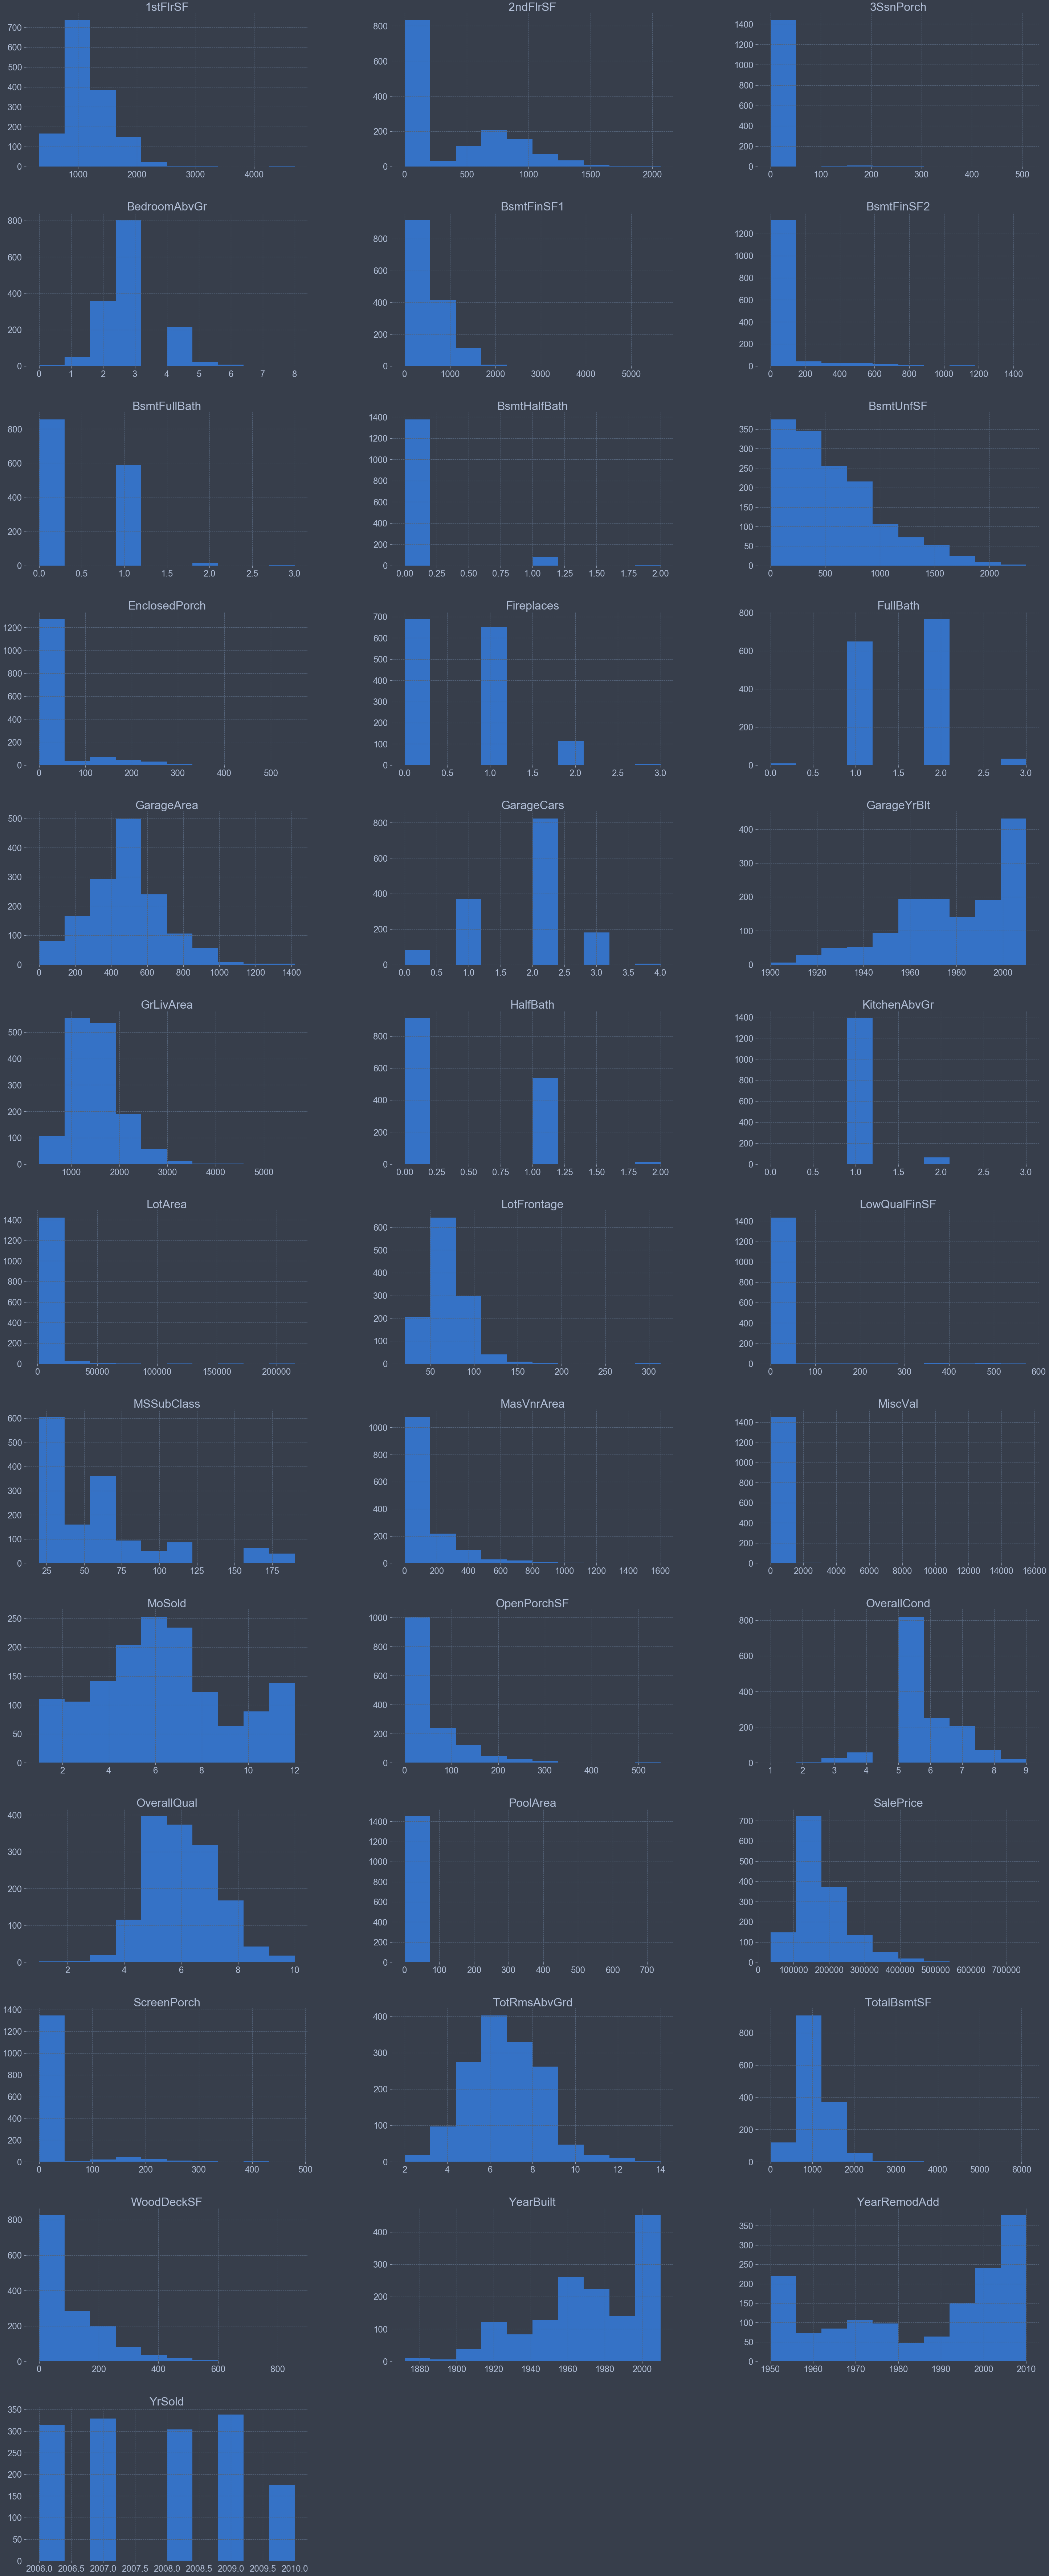

In [46]:
a = train.hist(figsize=(50,200),layout=(20,3))

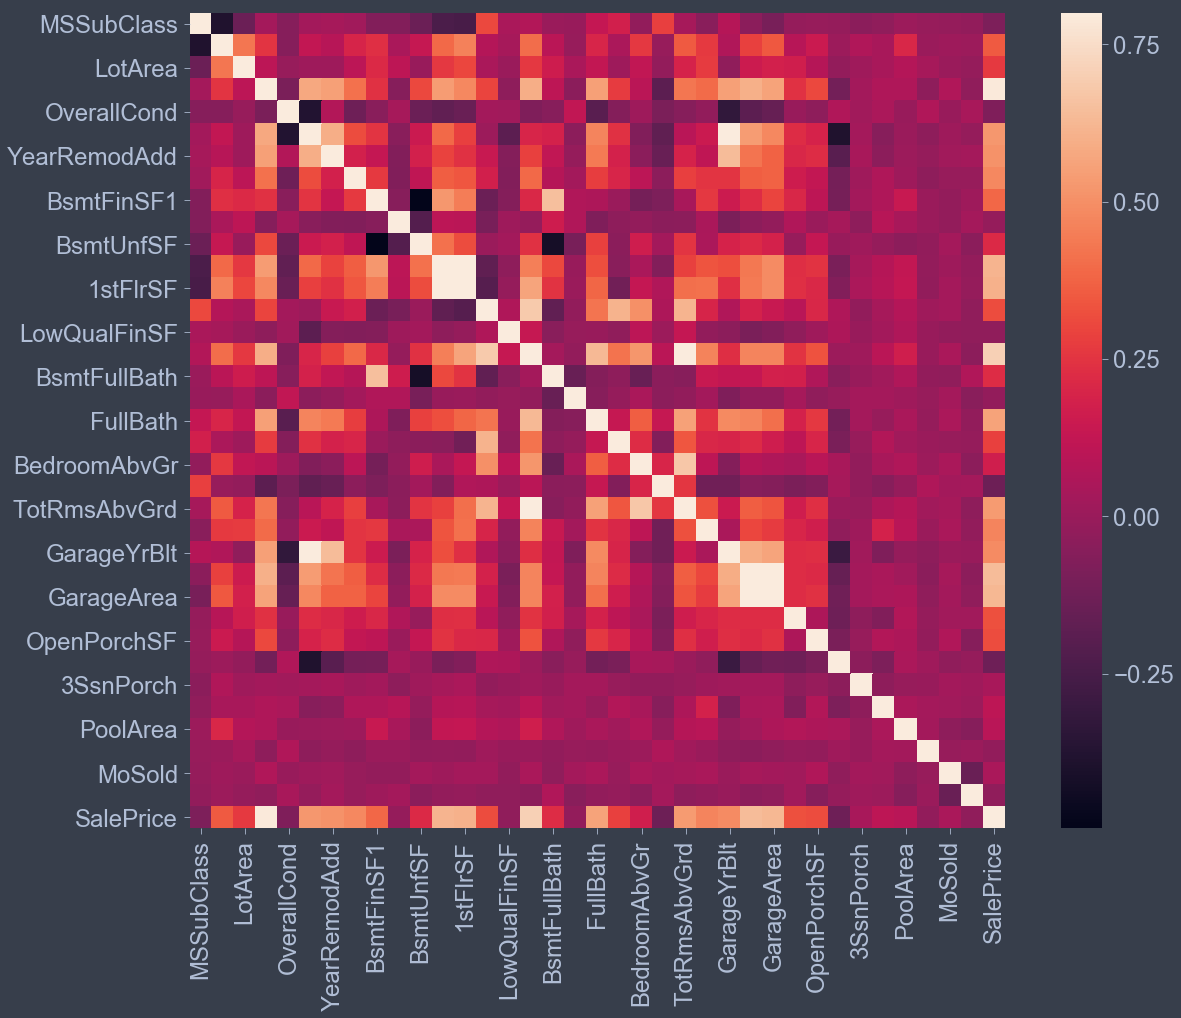

In [47]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(20, 15))
b = sns.heatmap(corrmat, vmax=.8, square=True, fmt='.2f', annot_kws={'size': 10});

In [147]:
sp = pd.DataFrame(corrmat[['SalePrice']])
sp.reset_index(inplace=True)
sp = sp.rename(columns={'index':'Feature'})
sp.head()

,Feature,SalePrice
0,MSSubClass,-0.084284
1,LotFrontage,0.351799
2,LotArea,0.263843
3,OverallQual,0.790982
4,OverallCond,-0.077856


In [148]:
sp.sort_values(by=['SalePrice'],inplace=True)
fig = px.bar(sp, x='Feature', y = 'SalePrice')
fig.show()

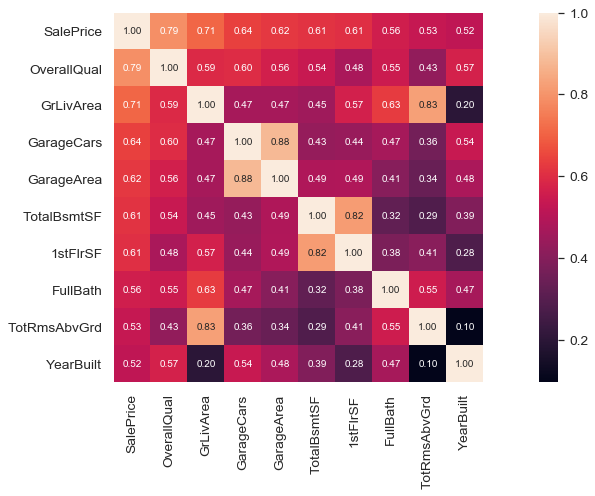

In [125]:
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)


In [149]:
corrmat.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856


In [151]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

#print(get_redundant_pairs(train))
top_corr = get_top_abs_correlations(corrmat,50)
top_corr = pd.DataFrame(top_corr)

In [152]:
#missing data
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])


In [155]:
train['LowQualFinSF'].replace(0, np.nan,  inplace=True)
train['BsmtFullBath'].replace(0, np.nan,  inplace=True)
train['BsmtHalfBath'].replace(0, np.nan,  inplace=True)
train['HalfBath'].replace(0, np.nan,  inplace=True)
train['Fireplaces'].replace(0, np.nan,  inplace=True)
train['GarageArea'].replace(0, np.nan,  inplace=True)
train['WoodDeckSF'].replace(0, np.nan,  inplace=True)
train['OpenPorchSF'].replace(0, np.nan,  inplace=True)
train['EnclosedPorch'].replace(0, np.nan,  inplace=True)
train['3SsnPorch'].replace(0, np.nan,  inplace=True)
train['ScreenPorch'].replace(0, np.nan,  inplace=True)
train['PoolArea'].replace(0, np.nan,  inplace=True)
train['MiscVal'].replace(0, np.nan,  inplace=True)
train['MasVnrType'].replace(0, np.nan,  inplace=True)
train['MasVnrArea'].replace(0, np.nan,  inplace=True)
train['BsmtFinSF1'].replace(0, np.nan,  inplace=True)
train['BsmtFinSF2'].replace(0, np.nan,  inplace=True)

In [156]:
missing_val_count_by_column = (train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

LotFrontage       259
Alley            1369
MasVnrType          8
MasVnrArea        869
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1        467
BsmtFinType2       38
BsmtFinSF2       1293
Electrical          1
LowQualFinSF     1434
BsmtFullBath      856
BsmtHalfBath     1378
HalfBath          913
Fireplaces        690
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageArea         81
GarageQual         81
GarageCond         81
WoodDeckSF        761
OpenPorchSF       656
EnclosedPorch    1252
3SsnPorch        1436
ScreenPorch      1344
PoolArea         1453
PoolQC           1453
Fence            1179
MiscFeature      1406
MiscVal          1408
dtype: int64


In [157]:
# make copy to avoid changing original data (when Imputing)
train2 = train.copy()

# Imputation
my_imputer = SimpleImputer(strategy = "most_frequent")
train2 = pd.DataFrame(my_imputer.fit_transform(train2))
train2.columns = train.columns

train = train2



In [158]:
#MISSING VALUES REMOVED
total = train.isnull().sum().sort_values(ascending=False)
percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
MasVnrType,0,0.0
MasVnrArea,0,0.0
ExterQual,0,0.0
ExterCond,0,0.0
Foundation,0,0.0


In [56]:
colvals = {
"MSSubClass" : { 20: "1-STORY 1946 & NEWER ALL STYLES", 30: "1-STORY 1945 & OLDER", 40: "1-STORY W/FINISHED ATTIC ALL AGES", 45: "1-1/2 STORY - UNFINISHED ALL AGES", 50: "1-1/2 STORY FINISHED ALL AGES", 60: "2-STORY 1946 & NEWER", 70: "2-STORY 1945 & OLDER", 75: "2-1/2 STORY ALL AGES", 80: "SPLIT OR MULTI-LEVEL", 85: "SPLIT FOYER", 90: "DUPLEX - ALL STYLES AND AGES",120: "1-STORY PUD (Planned Unit Development) - 1946 & NEWER",150: "1-1/2 STORY PUD - ALL AGES",160: "2-STORY PUD - 1946 & NEWER",180: "PUD - MULTILEVEL - INCL SPLIT LEV/FOYER",190: "2 FAMILY CONVERSION - ALL STYLES AND AGES"},
"MSZoning": {"A" : "Agriculture" ,"C" : "Commercial" ,"FV" : "Floating Village Residential" ,"I" : "Industrial" ,"RH" : "Residential High Density" ,"RL" : "Residential Low Density" ,"RP" : "Residential Low Density Park" ,"RM" : "Residential Medium Density" },
"Neighborhood":{"Blmngtn" : "Bloomington Heights","Blueste" : "Bluestem","BrDale" : "Briardale","BrkSide" : "Brookside","ClearCr" : "Clear Creek", "CollgCr" : "College Creek","Crawfor" : "Crawford","Edwards" : "Edwards","Gilbert" : "Gilbert","IDOTRR" : "Iowa DOT and Rail Road", "MeadowV" : "Meadow Village","Mitchel" : "Mitchell","Names" : "North Ames","NoRidge" : "Northridge", "NPkVill" : "Northpark Villa","NridgHt" : "Northridge Heights","NWAmes" : "Northwest Ames","OldTown" : "Old Town", "SWISU" : "South & West of Iowa State University","Sawyer" : "Sawyer","SawyerW" : "Sawyer West","Somerst" : "Somerset","StoneBr" : "Stone Brook","Timber" : "Timberland","Veenker" : "Veenker"},
"Condition1": { "Artery" : "Adjacent to arterial street", "Feedr" : "Adjacent to feeder street","Norm" : "Normal", "RRNn" : "Within 200' of North-South Railroad","RRAn" : "Adjacent to North-South Railroad","PosN" : "Near positive off-site feature--park, greenbelt, etc.", "PosA" : "Adjacent to postive off-site feature", "RRNe" : "Within 200' of East-West Railroad", "RRAe":"Adjacent to East-West Railroad" },
"Condition2": {"Artery"  : "Adjacent to arterial street", "Feedr" : "Adjacent to feeder street","Norm" : "Normal", "RRNn" : "Within 200' of North-South Railroad","RRAn" : "Adjacent to North-South Railroad","PosN" : "Near positive off-site feature--park, greenbelt, etc.", "PosA" : "Adjacent to postive off-site feature", "RRNe" : "Within 200' of East-West Railroad", "RRAe" : "Adjacent to East-West Railroad"},
"HouseStyle": {"1Story" : "One story","1.5Fin" : "5Fin One and one-half story: 2nd level finished","1.5Unf" : "5Unf One and one-half story: 2nd level unfinished","2Story" : "Two story","2.5Fin" :"Two and one-half story: 2nd level finished","2.5Unf" :"Two and one-half story: 2nd level unfinished","SFoyer" : "Split Foyer","SLvl" : "Split Level"},
"Exterior1st":{"AsbShng" : "Asbestos Shingles","AsphShn" : "Asphalt Shingles","BrkComm" : "Brick Common","BrkFace" : "Brick Face","CBlock" : "Cinder Block","CemntBd" : "Cement Board","HdBoard" : "Hard Board","ImStucc" : "Imitation Stucco","MetalSd" : "Metal Siding","Other" : "Other","Plywood" : "Plywood","PreCast" : "PreCast","Stone" : "Stone","Stucco" : "Stucco","VinylSd" : "Vinyl Siding","Wd" : "Sdng Wood Siding","WdShing" : "Wood Shingles"},
"Exterior2nd":{"AsbShng" : "Asbestos Shingles","AsphShn" : "Asphalt Shingles","BrkComm" : "Brick Common","BrkFace" : "Brick Face","CBlock" : "Cinder Block","CemntBd" : "Cement Board","HdBoard" : "Hard Board","ImStucc" : "Imitation Stucco","MetalSd" : "Metal Siding","Other" : "Other","Plywood" : "Plywood","PreCast" : "PreCast","Stone" : "Stone","Stucco" : "Stucco","VinylSd" : "Vinyl Siding","Wd" : "Sdng Wood Siding","WdShing" : "Wood Shingles"},
"Electrical": { "SBrkr" : "Standard Circuit Breakers & Romex", "FuseA" : "Fuse Box over 60 AMP and all Romex wiring (Average) ", "FuseF" : "60 AMP Fuse Box and mostly Romex wiring (Fair)", "FuseP" : "60 AMP Fuse Box and mostly knob & tube wiring (poor)", "Mix" : "Mixed"},
"Functional": { "Typ" : "Typical Functionality", "Min1" : "Minor Deductions 1", "Min2" : "Minor Deductions 2", "Mod" : "Moderate Deductions", "Maj1" : "Major Deductions 1", "Maj2" : "Major Deductions 2", "Sev" : "Severely Damaged", "Sal" : "Salvage only"},
"FireplaceQu":{ "Ex" : "Excellent - Exceptional Masonry Fireplace", "Gd" : "Good - Masonry Fireplace in main level", "TA" : "Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement", "Fa" : "Fair - Prefabricated Fireplace in basement", "Po" : "Poor - Ben Franklin Stove", "NA" : "No Fireplace"},
"GarageType": {"2Types" : "More than one type of garage","Attchd" : "Attached to home","Basment" : "Basement Garage","BuiltIn" : "Built-In (Garage part of house - typically has room above garage)","CarPort" : "Car Port","Detchd" : "Detached from home","NA" : "No Garage"},
"SaleType": { "WD" : " Warranty Deed - Conventional", "CWD" : "Warranty Deed - Cash", "VWD" : "Warranty Deed - VA Loan", "New" : "Home just constructed and sold", "COD" : "Court Officer Deed/Estate", "Con" : "Contract 15% Down payment regular terms", "ConLw" : "Contract Low Down payment and low interest", "ConLI" : "Contract Low Interest", "ConLD" : "Contract Low Down", "Oth" : "Other"},
"SaleCondition":{"Normal" : "Normal Sale","Abnorml" : "Abnormal Sale -trade, foreclosure, short sale","AdjLand" : "Adjoining Land Purchase","Alloca" : "Allocation - two linked properties with separate deeds, typically condo with a garage unit","Family" : "Sale between family members","Partial" : "Home was not completed when last assessed (associated with New Homes)"}, 
"Street" : { "Grvl":"Gravel","Pave": "Paved"},
"Alley" : {"Grvl": "Gravel","Pave": "Paved","NA":"No alley access"},
"LotShape" :{"Reg":"Regular" ,"IR1":"Slightly Irregular","IR2":"Moderately Irregular","IR3":"Irregular"},
"LandContour" :{ "Lvl": "Near Flat/Level","Bnk": "Banked","HLS": "Hillside","Low": "Depression"},
"Utilities": { "AllPub": "All public Utilities (E,G,W,& S)" ,"NoSewr": "Electricity, Gas, and Water (Septic Tank)", "NoSeWa": "Electricity and Gas Only", "ELO": "Electricity only"},
"LotConfig": {"Inside": "Inside lot","Corner": "Corner lot","CulDSac": "Cul-de-sac","FR2" :"Frontage on 2 sides","FR3": "Frontage on 3 sides"},
"LandSlope" :{ "Gtl":"Gentle slope","Mod":"Moderate Slope","Sev":"Severe Slope"},
"BldgType": {"1Fam" : "Single-family Detached" ,"2FmCon" : "Two-family Conversion" ,"Duplx" : "Duplex" ,"TwnhsE" : "Townhouse End Unit" ,"TwnhsI" : "Townhouse Inside Unit"},
"OverallQual": {"10" : "Very Excellent","9" : "Excellent","8" : "Very Good","7" : "Good","6" : "Above Average","5" : "Average","4" : "Below Average","3" : "Fair","2" : "Poor","1" : "Very Poor"},
"OverallCond": {"10" : "Very Excellent","9" : "Excellent","8" : "Very Good","7" : "Good","6" : "Above Average","5" : "Average","4" : "Below Average","3" : "Fair","2" : "Poor","1" : "Very Poor"},
"RoofStyle":{"Flat" : "Flat","Gable" : "Gable","Gambrel" : "Gabrel (Barn)","Hip" : "Hip","Mansard" : "Mansard","Shed" : "Shed"},
"RoofMatl": { "ClyTile" : "Clay or Tile" ,"CompShg" : "Standard (Composite) Shingle" ,"Membran" : "Membrane" ,"Metal" : "Metal" ,"Roll" : "Roll" ,"Tar" :"Grv Gravel & Tar" ,"WdShake" : "Wood Shakes" ,"WdShngl" : "Wood Shingles"},
"MasVnrType":{"BrkCmn" : "Brick Common","BrkFace" : "Brick Face","CBlock" : "Cinder Block","None" : "None","Stone" : "Stone"},
"ExterQual": {"Ex" : "Excellent" ,"Gd" : "Good" ,"TA" : "Average/Typical" ,"Fa" : "Fair" ,"Po" : "Poor"},
"ExterCond": { "Ex" : "Excellent", "Gd" : "Good", "TA" : "Average/Typical", "Fa" : "Fair", "Po" : "Poor"},
"Foundation":{"BrkTil" : "Brick & Tile","CBlock" : "Cinder Block","PConc" : "Poured Contrete","Slab" : "Slab","Stone" : "Stone","Wood" : "Wood"},
"BsmtQual": { "Ex" : "Excellent (100+ inches)", "Gd" : "Good (90-99 inches)", "TA" : "Typical (80-89 inches)", "Fa" : "Fair (70-79 inches)", "Po" : "Poor (<70 inches", "NA" : "No Basement"},
"BsmtCond": {"Ex" : "Excellent","Gd" : "Good","TA" : "Typical - slight dampness allowed","Fa" : "Fair - dampness or some cracking or settling","Po" : "Poor - Severe cracking, settling, or wetness","NA" : "No Basement"},
"BsmtExposure": {"Gd" : "Good Exposure", "Av" : "Average Exposure (split levels or foyers typically score average or above)", "Mn" : "Mimimum Exposure", "No" : "No Exposure", "NA" : "No Basement"},
"BsmtFinType1": { "GLQ" : "Good Living Quarters", "ALQ" : "Average Living Quarters", "BLQ" : "Below Average Living Quarters", "Rec" : "Average Rec Room", "LwQ" : "Low Quality", "Unf" : "Unfinshed", "NA" : "No Basement"},
"BsmtFinType2":  {"GLQ" : "Good Living Quarters", "ALQ" : "Average Living Quarters", "BLQ" : "Below Average Living Quarters", "Rec" : "Average Rec Room", "LwQ" : "Low Quality", "Unf" : "Unfinshed", "NA" : "No Basement"},
"Heating": { "Floor" : "Floor Furnace", "GasA" : "Gas forced warm air furnace", "GasW" : "Gas hot water or steam heat", "Grav" : "Gravity furnace ", "OthW" : "Hot water or steam heat other than gas", "Wall" : "Wall furnace"},
"HeatingQC":{"Ex" : "Excellent","Gd" : "Good","TA" : "Average/Typical", "Fa":"Fair","Po" : "Poor"},
"CentralAir":{ "N" : "No", "Y" : "Yes"},
"KitchenQual":{"Ex" : "Excellent","Gd" : "Good","TA" : "Typical/Average","Fa" : "Fair","Po" : "Poor"},
"GarageFinish":{ "Fin" : "Finished", "RFn" : "Rough Finished ", "Unf" : "Unfinished", "NA" : "No Garage"},
"GarageQual": {"Ex" : "Excellent","Gd" : "Good","TA" : "Typical/Average","Fa" : "Fair","Po" : "Poor","NA" : "No Garage"},
"GarageCond": {"Ex" : "Excellent","Gd" : "Good","TA" : "Typical/Average","Fa" : "Fair","Po" : "Poor","NA" : "No Garage"},
"PavedDrive": {"Y" : "Paved","P" : "Partial Pavement","N" : "Dirt/Gravel"},
"PoolQC":  {"Ex" : "Excellent","Gd" : "Good","TA" : "Average/Typical","Fa" : "Fair","NA" : "No Pool"},
"Fence":{"GdPrv" : "Good Privacy","MnPrv" : "Minimum Privacy","GdWo" : "Good Wood","MnWw" : "Minimum Wood/Wire","NA" : "No Fence"},
"MiscFeature": { "Elev" : "Elevator", "Gar2":"2nd Garage (if not described in garage section)", "Othr" : "Other", "Shed" : "Shed (over 100 SF)", "TenC" : "Tennis Court", "NA" : "None"}}

In [57]:
for k1,v1 in colvals.items():
    train[k1] = train[k1].map(v1)

In [159]:
fig = px.box(train, y='SalePrice', x='ExterQual', points="suspectedoutliers")
fig.show()

In [38]:
for col in train.columns:
    fig = px.box(train, y='SalePrice', x=col,  points="suspectedoutliers")
    fig.show()

In [39]:
for col in train.columns:
    fig = px.scatter(train, y='SalePrice', x=col)
    fig.show()

In [ ]:
corrmat = train.corr()
sp = pd.DataFrame(corrmat[['SalePrice']])
sp.reset_index(inplace=True)
sp = sp.rename(columns={'index':'Feature'})
sp.head()
sp.sort_values(by=['SalePrice'],inplace=True)
fig = px.bar(sp, x='Feature', y = 'SalePrice')
fig.show()

In [ ]:
sp.sort_values(by=['SalePrice'],inplace=True)
fig = px.bar(sp, x='Feature', y = 'SalePrice')
fig.show()

In [ ]:
sp['SalePrice'] = pd.to_numeric(sp.SalePrice)
sp['SalePrice'] = abs(sp.SalePrice)

In [58]:
train.head()
